# Economic Data Analysis with Fred & Pandas

In [112]:
#!pip install fredapi

In [113]:
import fredapi as Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pmdarima as pm
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "9dd01b638e731f4100af1f1100f92e0c"


# 1. Create The Fred Object

In [114]:
fred = Fred(api_key=fred_key)

# 2. Pull and Join Multiple Data Series

In [115]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [116]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [117]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [118]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [119]:
# Plot States Unemployment Rate
px.line(uemp_states)

In [120]:
uemp_states.reset_index(inplace=True)
uemp_states.rename(columns={'index':'Year'}, inplace=True)

uemp_states

,Year,California,Florida,Texas,New York,Ohio,Alabama,Michigan,Colorado,Pennsylvania,Illinois,Massachusetts,Kentucky,Wisconsin,North Carolina,Minnesota,Arizona,New Jersey,Oregon,Indiana,Georgia,Louisiana,South Carolina,Washington,Utah,Oklahoma,Tennessee,Missouri,West Virginia,Maryland,Virginia,Nevada,New Mexico,North Dakota,Arkansas,Iowa,Alaska,Kansas,Hawaii,Puerto Rico,the District of Columbia,Connecticut,Nebraska,Montana,South Dakota,Mississippi,Delaware,New Hampshire,Idaho,Maine,Wyoming,Rhode Island,Vermont
0,1976-01-01,9.2,9.7,5.8,10.3,8.1,6.6,9.9,5.8,8.0,6.6,10.5,5.6,5.8,6.4,6.0,10.2,10.3,9.5,6.6,8.4,6.3,7.4,8.5,5.8,5.8,6.0,5.9,7.5,6.4,6.1,9.2,8.6,3.4,7.3,4.3,7.1,4.2,9.8,19.6,8.7,9.8,3.3,5.8,3.3,6.7,8.0,6.5,5.6,8.7,4.1,7.8,8.6
1,1976-02-01,9.2,9.7,5.8,10.3,8.1,6.6,9.9,5.7,8.1,6.6,10.5,5.6,5.8,6.4,6.0,10.2,10.3,9.5,6.6,8.4,6.3,7.4,8.5,5.9,5.8,6.0,5.9,7.5,6.4,6.1,9.2,8.7,3.4,7.3,4.3,7.1,4.2,9.8,19.5,8.7,9.8,3.3,5.8,3.3,6.7,8.0,6.5,5.6,8.7,4.1,7.8,8.6
2,1976-03-01,9.1,9.6,5.9,10.2,8.1,6.6,9.9,5.7,8.1,6.6,10.5,5.6,5.7,6.4,5.9,10.1,10.3,9.4,6.5,8.4,6.3,7.3,8.4,5.8,5.8,6.0,5.9,7.5,6.4,6.1,9.2,8.7,3.4,7.3,4.3,7.0,4.2,9.8,19.3,8.6,9.8,3.3,5.8,3.2,6.6,8.0,6.5,5.6,8.6,4.1,7.7,8.6
3,1976-04-01,9.1,9.5,5.9,10.2,8.0,6.5,9.8,5.6,8.1,6.6,10.3,5.6,5.6,6.3,5.8,10.0,10.3,9.2,6.3,8.3,6.4,7.2,8.5,5.8,5.8,6.0,6.0,7.5,6.4,6.0,9.0,8.6,3.5,7.2,4.2,6.9,4.2,9.7,19.0,8.5,9.6,3.2,5.8,3.1,6.4,8.1,6.5,5.6,8.6,4.0,7.7,8.6
4,1976-05-01,9.0,9.3,5.9,10.1,7.8,6.4,9.6,5.6,8.1,6.6,10.1,5.5,5.5,6.1,5.7,9.8,10.3,9.1,6.0,8.1,6.5,7.0,8.5,5.7,5.7,5.9,6.0,7.4,6.5,5.9,8.9,8.6,3.6,7.1,4.1,6.9,4.2,9.4,18.9,8.4,9.4,3.1,5.8,3.1,6.3,8.3,6.5,5.6,8.5,3.9,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2023-02-01,4.4,2.6,4.0,4.2,3.9,2.5,4.3,2.9,4.4,4.5,3.7,3.9,2.7,3.6,3.0,3.7,3.5,4.7,3.1,3.1,3.6,3.2,4.6,2.4,3.0,3.5,2.6,3.7,2.9,3.2,5.5,3.6,2.1,3.2,2.9,3.8,2.9,3.6,6.0,4.7,4.0,2.3,2.4,2.1,3.7,4.6,2.7,2.6,2.8,3.8,3.1,2.8
564,2023-03-01,4.4,2.6,4.0,4.1,3.8,2.3,4.1,2.8,4.2,4.4,3.5,3.8,2.5,3.5,2.8,3.5,3.5,4.4,3.1,3.1,3.6,3.2,4.5,2.4,3.0,3.4,2.5,3.4,2.7,3.2,5.5,3.5,2.1,3.0,2.8,3.7,2.9,3.5,6.0,4.8,3.9,2.1,2.3,1.9,3.5,4.4,2.4,2.6,2.6,3.7,3.1,2.7
565,2023-04-01,4.5,2.6,4.0,4.0,3.7,2.2,3.8,2.8,4.1,4.2,3.1,3.7,2.4,3.4,2.8,3.4,3.5,4.0,3.0,3.1,3.6,3.1,4.3,2.3,2.9,3.3,2.5,3.3,2.5,3.1,5.4,3.5,2.1,2.8,2.7,3.7,2.9,3.3,6.0,5.0,3.8,2.0,2.3,1.9,3.4,4.3,2.1,2.6,2.4,3.5,3.0,2.4
566,2023-05-01,4.5,2.6,4.1,3.9,3.6,2.2,3.7,2.8,4.0,4.1,2.8,3.8,2.4,3.4,2.9,3.4,3.6,3.7,3.1,3.2,3.6,3.1,4.1,2.3,2.8,3.3,2.5,3.3,2.4,2.9,5.4,3.5,2.1,2.7,2.7,3.6,2.9,3.1,6.1,5.1,3.7,1.9,2.3,1.9,3.2,4.2,1.9,2.6,2.4,3.3,3.0,2.1


In [121]:
df = uemp_states

 # 3. TIME SERIES - ARIMA model


In [122]:
# Assuming 'Year' is already in int64 format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.set_index('Year')

In [123]:
state_columns = df.columns

state_predictions = {}

for state in state_columns:
    train_size = int(len(df[state]) * 0.8)
    train_data = df[state].iloc[:train_size]
    test_data = df[state].iloc[train_size:]
    
df['US_Average'] = df[state_columns].mean(axis=1)

In [124]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your DataFrame is named 'df' with the 'Year' column already set as the index

# Select the state for which you want to build the ARIMA model
state_to_predict = 'California'
state_data = df[state_to_predict]

# Split the data into training and testing sets
train_size = int(len(state_data) * 0.8)
train_data = state_data.iloc[:train_size]
test_data = state_data.iloc[train_size:]


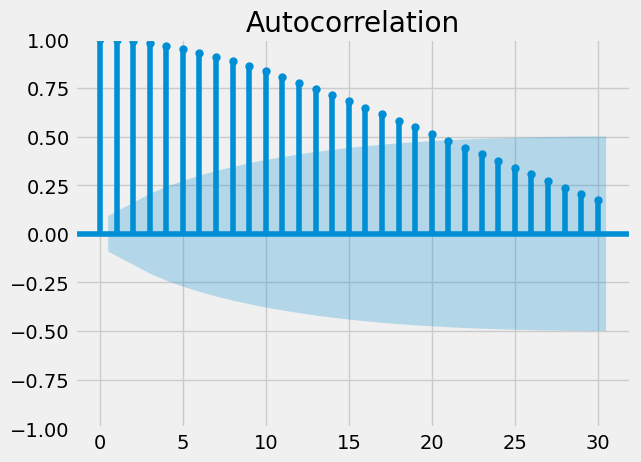

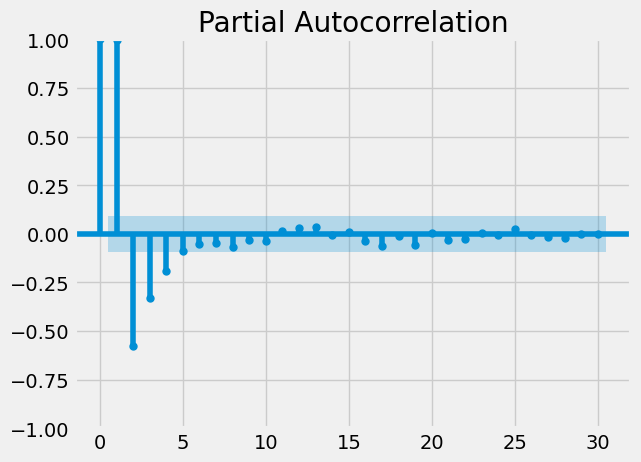

In [125]:
# Plot ACF and PACF to determine the order (p, d, q) of the ARIMA model
plot_acf(train_data, lags=30)
plot_pacf(train_data, lags=30)
plt.show()

In [126]:
from pmdarima.arima import auto_arima

# Find the appropriate ARIMA order using auto_arima
model = auto_arima(train_data, seasonal=True, suppress_warnings=True, stepwise=True)

# Get the best ARIMA order from the auto_arima result
order = model.order

# Print the best ARIMA order
print("Best ARIMA Order (p, d, q):", order)   

Best ARIMA Order (p, d, q): (2, 1, 2)


In [127]:
# Fit the ARIMA model
p, d, q = 2, 1, 2  # Replace these values with the order determined from ACF and PACF plots
arima_model = ARIMA(train_data, order=(p, d, q))
arima_fit = arima_model.fit()

# Make predictions
predictions = arima_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)


c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



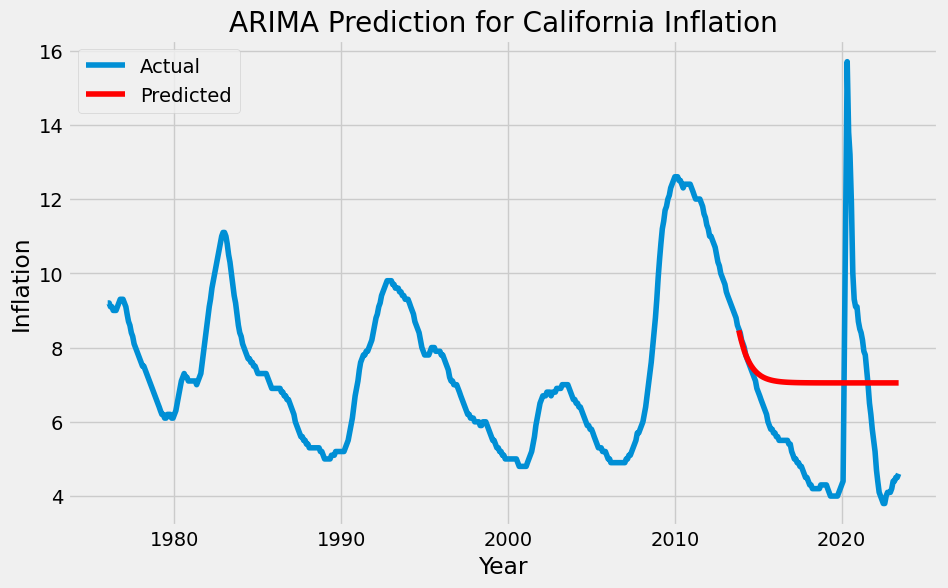

In [128]:
# Visualize the actual vs. predicted inflation for the state
plt.figure(figsize=(10, 6))
plt.plot(df.index, state_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title(f'ARIMA Prediction for {state_to_predict} Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.legend()
plt.show()

# 4. Create and fit the Prophet model


In [129]:
from prophet import Prophet
df = uemp_states.copy()
inflation_data = df

In [130]:
# Select the state for which you want to build the Prophet model (e.g., California)
state_to_predict = 'California'
state_data = inflation_data[['Year', state_to_predict]].copy()
state_data

,Year,California
0,1976-01-01,9.2
1,1976-02-01,9.2
2,1976-03-01,9.1
3,1976-04-01,9.1
4,1976-05-01,9.0
...,...,...
563,2023-02-01,4.4
564,2023-03-01,4.4
565,2023-04-01,4.5
566,2023-05-01,4.5


In [131]:
# Rename columns to 'ds' and 'y' as required by Prophet
state_data.rename(columns={'Year': 'ds', state_to_predict: 'y'}, inplace=True)
state_data

,ds,y
0,1976-01-01,9.2
1,1976-02-01,9.2
2,1976-03-01,9.1
3,1976-04-01,9.1
4,1976-05-01,9.0
...,...,...
563,2023-02-01,4.4
564,2023-03-01,4.4
565,2023-04-01,4.5
566,2023-05-01,4.5


In [132]:
# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(state_data)

10:39:26 - cmdstanpy - INFO - Chain [1] start processing
10:39:26 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
# Create a future DataFrame for prediction (next 12 months)
future = prophet_model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = prophet_model.predict(future)

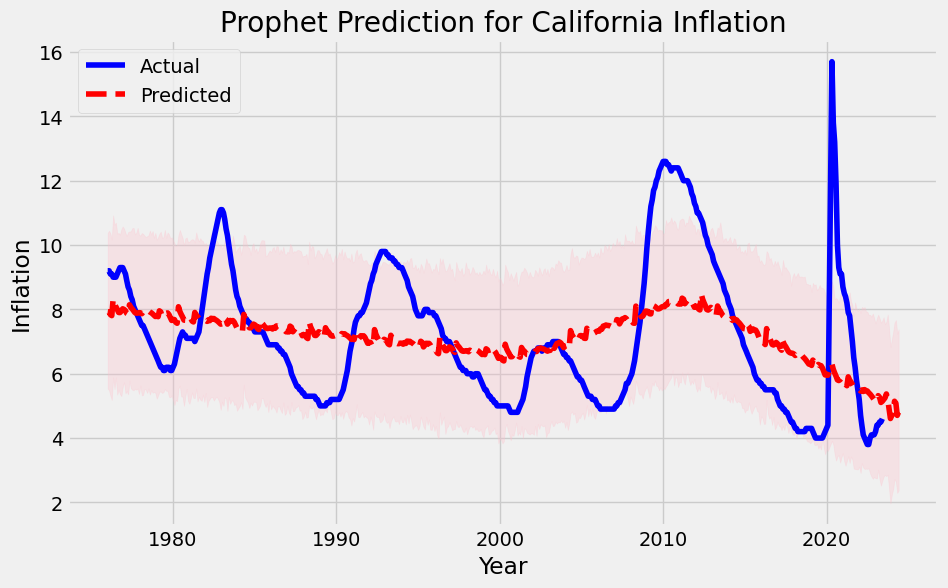

In [134]:
# Visualize the actual vs. predicted inflation for the state
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(state_data['ds'], state_data['y'], 'b-', label='Actual')
ax.plot(forecast['ds'], forecast['yhat'], 'r--', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')
plt.title(f'Prophet Prediction for {state_to_predict} Inflation')
plt.show()

# 5. Consumer Price Index

In [135]:
cpi_df = fred.search('consumer', filter=('frequency','Monthly'))
cpi_df = cpi_df.query('seasonal_adjustment == "Seasonally Adjusted"')
cpi_df = cpi_df.loc[cpi_df['title'].str.contains('Consumer Price Index for All Urban Consumers')]
cpi_df = cpi_df.query('id == "CPIAUCSL"')

cpi_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-08-08,2023-08-08,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-06-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-07-12 07:41:01-05:00,93,The Consumer Price Index for All Urban Consume...


In [136]:
all_results = []

for myid in cpi_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
cpi_df = pd.concat(all_results, axis=1)

In [137]:
cpi_df = cpi_df.reset_index()
cpi_df.rename(columns={'index':'Year'}, inplace=True)

cpi_df

,Year,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


In [138]:
# Convert 'Year' column to datetime format
cpi_df['Year'] = pd.to_datetime(cpi_df['Year'])

# Plot the data using Plotly
fig = px.line(cpi_df, x='Year', y='CPIAUCSL', title='Consumer Price Index (CPI) over Time')
fig.show()

# 6. Participation Rate


In [139]:
ptr_df = fred.search('Participation Rate', filter=('frequency','Monthly'), order_by='popularity')

ptr_df = ptr_df.query('seasonal_adjustment == "Seasonally Adjusted"')

ptr_df = ptr_df.loc[ptr_df['title'].str.contains('Labor Force Participation Rate')]

ptr_df = ptr_df.query('id == "CIVPART"')

ptr_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-08-08,2023-08-08,Labor Force Participation Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:21-05:00,85,The series comes from the 'Current Population ...


In [140]:
all_results = []

for myid in ptr_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
ptr_df = pd.concat(all_results, axis=1)


In [141]:
ptr_df = ptr_df.reset_index()
ptr_df.rename(columns={'index':'Year'}, inplace=True)

ptr_df

,Year,CIVPART
0,1948-01-01,58.6
1,1948-02-01,58.9
2,1948-03-01,58.5
3,1948-04-01,59.0
4,1948-05-01,58.3
...,...,...
902,2023-03-01,62.6
903,2023-04-01,62.6
904,2023-05-01,62.6
905,2023-06-01,62.6


In [142]:
# Convert 'Year' column to datetime format
ptr_df['Year'] = pd.to_datetime(ptr_df['Year'])

# Plot the data using Plotly
fig = px.line(ptr_df, x='Year', y='CIVPART', title='Labor Force Participation Rate over Time')
fig.show()

# 7. Time Series with more variables 

In [143]:
cal_unmp = state_data.copy()
cal_unmp.rename(columns={'ds':'Year', 'y':'unp'}, inplace=True)


In [144]:
# Merge ptr_df and cpi_df on 'Year' column
merged_df = ptr_df.merge(cpi_df, on='Year', how='inner')

# Merge merged_df and cal_unmp on 'Year' column
df = merged_df.merge(cal_unmp, on='Year', how='inner')

In [145]:
df.rename(columns={'CIVPART':'partrate', 'CPIAUCSL':'cpi'}, inplace=True)

In [146]:
df1 = df.copy()

In [147]:
df['Year'] = pd.to_datetime(df['Year'])

# Define your exogenous variables
exog_vars = ['partrate', 'cpi']

In [148]:
# Split the data into training and test sets
train_size = int(0.8 * len(df))
train, test = df[:train_size], df[train_size:]

# Find the best ARIMA order using AutoARIMA on the training data
autoarima_model = pm.auto_arima(train['unp'], exogenous=train[exog_vars], seasonal=True, m=12)

autoarima_model

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [149]:
import statsmodels.api as sm

In [150]:
# Create and fit the ARIMAX model on the training data
model = sm.tsa.SARIMAX(train['unp'], exog=train[exog_vars], order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [151]:
# Make predictions on the test data
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps, exog=test[exog_vars])

# Access predicted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

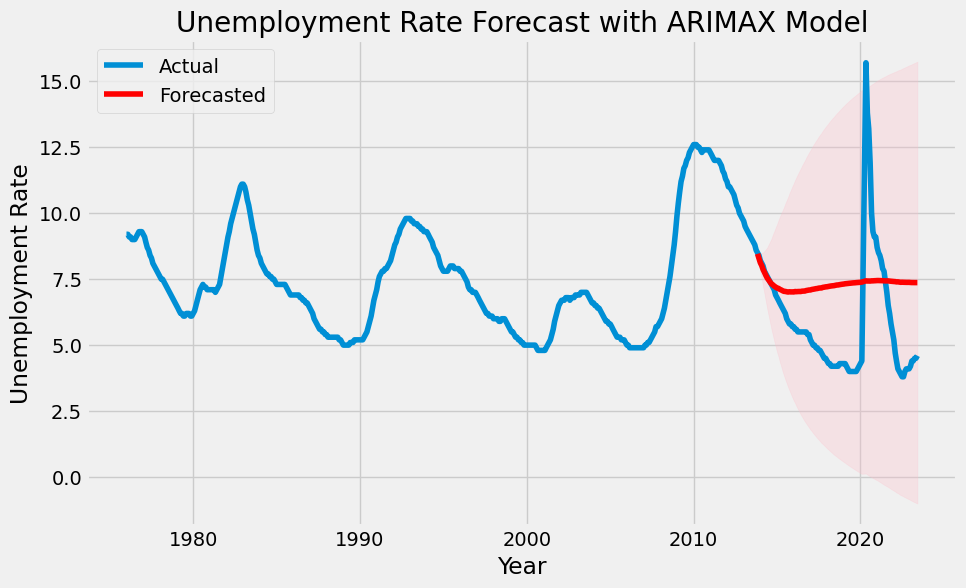

In [152]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['unp'], label='Actual')
plt.plot(test['Year'], forecast_mean.values, color='red', label='Forecasted')
plt.fill_between(test['Year'], forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecast with ARIMAX Model')
plt.legend()
plt.show()

## PROPHET

In [153]:
df1.head()

,Year,partrate,cpi,unp
0,1976-01-01,61.3,55.8,9.2
1,1976-02-01,61.3,55.9,9.2
2,1976-03-01,61.3,56.0,9.1
3,1976-04-01,61.6,56.1,9.1
4,1976-05-01,61.5,56.4,9.0


In [156]:
df1.rename(columns={'Year': 'ds', 'unp': 'y', 'partrate': 'partrate', 'cpi': 'cpi'}, inplace=True)

In [157]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing Values:")
print(missing_values)

# Compare lengths of DataFrame and columns
print("Length of DataFrame:", len(df1))
print("Length of 'partrate' column:", len(df1['partrate']))
print("Length of 'cpi' column:", len(df1['cpi']))
print("Length of 'y' column:", len(df1['y']))

Missing Values:
ds          0
partrate    0
cpi         0
y           0
dtype: int64
Length of DataFrame: 568
Length of 'partrate' column: 568
Length of 'cpi' column: 568
Length of 'y' column: 568


In [158]:
# Drop rows with missing values
df1 = df1.dropna()

In [163]:
df1.set_index('ds')

,partrate,cpi,y
ds,,,
1976-01-01,61.3,55.800,9.2
1976-02-01,61.3,55.900,9.2
1976-03-01,61.3,56.000,9.1
1976-04-01,61.6,56.100,9.1
1976-05-01,61.5,56.400,9.0
...,...,...,...
2023-02-01,62.5,301.648,4.4
2023-03-01,62.6,301.808,4.4
2023-04-01,62.6,302.918,4.5


In [165]:
# Create and fit the Prophet model with exogenous regressors
model = Prophet()
model.add_regressor('partrate')
model.add_regressor('cpi')
model.fit(df1)

# Make predictions on the available data
forecast = model.predict(df1)

10:47:32 - cmdstanpy - INFO - Chain [1] start processing
10:47:32 - cmdstanpy - INFO - Chain [1] done processing


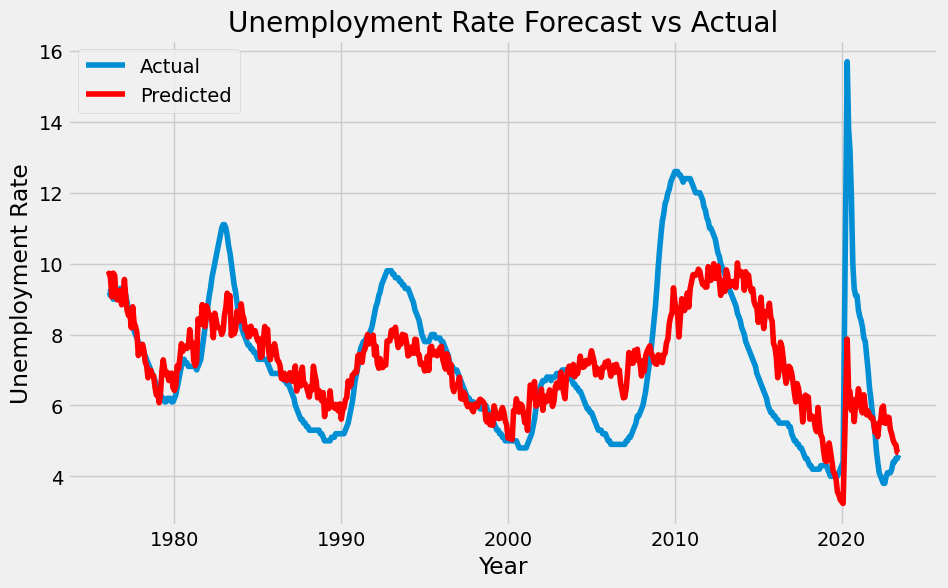

In [166]:
# Plot the actual and predicted results
plt.figure(figsize=(10, 6))
plt.plot(df1['ds'], df1['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecast vs Actual')
plt.legend()
plt.show()

# THE END